<a href="https://colab.research.google.com/github/BojanKomazec/tensorflow-demo-notebooks/blob/main/LSTM_sine_wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modified code from https://qiita.com/yukiB/items/5d5b202af86e3c587843

In [ ]:
import pandas as pd
import numpy as np
import math
import random

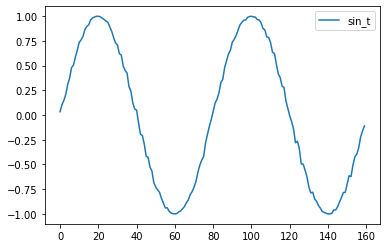

In [ ]:
random.seed(0)

random_factor = 0.05

steps_per_cycle = 80

number_of_cycles = 50

df = pd.DataFrame(np.arange(steps_per_cycle * number_of_cycles + 1), columns=["t"])
df["sin_t"] = df.t.apply(lambda x: math.sin(x * (2 * math.pi / steps_per_cycle)+ random.uniform(-1.0, +1.0) * random_factor))
df[["sin_t"]].head(steps_per_cycle * 2).plot()

In [ ]:
def _load_data(data, n_prev = 100):  
    """
    data should be pd.DataFrame()
    """

    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev].values)
        docY.append(data.iloc[i+n_prev].values)
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY

def train_test_split(df, test_size=0.1, n_prev = 100):  
    """
    This just splits data to training and testing parts
    """
    ntrn = round(len(df) * (1 - test_size))
    ntrn = int(ntrn)
    X_train, y_train = _load_data(df.iloc[0:ntrn], n_prev)
    X_test, y_test = _load_data(df.iloc[ntrn:], n_prev)

    return (X_train, y_train), (X_test, y_test)

In [ ]:
length_of_sequences = 100
(X_train, y_train), (X_test, y_test) = train_test_split(df[["sin_t"]], n_prev =length_of_sequences)  

In [ ]:
from keras.models import Sequential  
from keras.layers.core import Dense, Activation  
from keras.layers.recurrent import LSTM

In [ ]:
in_out_neurons = 1
hidden_neurons = 300

model = Sequential()  
model.add(LSTM(hidden_neurons, batch_input_shape=(None, length_of_sequences, in_out_neurons), return_sequences=False))  
model.add(Dense(in_out_neurons))  
model.add(Activation("linear"))  
model.compile(loss="mean_squared_error", optimizer="rmsprop")
model.fit(X_train, y_train, batch_size=600, epochs=15, validation_split=0.05) 

Epoch 1/15
6/6 [==============================] - 45s 4s/step - loss: 0.2729 - val_loss: 0.0720
Epoch 2/15
6/6 [==============================] - 20s 3s/step - loss: 0.0422 - val_loss: 8.1709e-04
Epoch 3/15
6/6 [==============================] - 20s 3s/step - loss: 0.0057 - val_loss: 0.0052
Epoch 4/15
6/6 [==============================] - 20s 3s/step - loss: 0.0054 - val_loss: 0.0104
Epoch 5/15
6/6 [==============================] - 20s 3s/step - loss: 0.0089 - val_loss: 0.0086
Epoch 6/15
6/6 [==============================] - 20s 3s/step - loss: 0.0087 - val_loss: 0.0137
Epoch 7/15
6/6 [==============================] - 20s 3s/step - loss: 0.0084 - val_loss: 0.0096
Epoch 8/15
6/6 [==============================] - 20s 3s/step - loss: 0.0091 - val_loss: 0.0070
Epoch 9/15
6/6 [==============================] - 23s 4s/step - loss: 0.0067 - val_loss: 0.0140
Epoch 10/15
6/6 [==============================] - 21s 3s/step - loss: 0.0147 - val_loss: 0.0061
Epoch 11/15
6/6 [==================

In [ ]:
predicted = model.predict(X_test) 

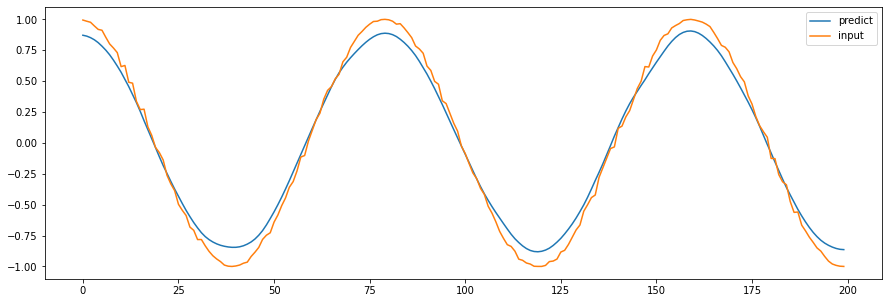

In [ ]:
dataf =  pd.DataFrame(predicted[:200])
dataf.columns = ["predict"]
dataf["input"] = y_test[:200]
dataf.plot(figsize=(15, 5))